# Makine Öğrenmesine Giriş (Introduction to Machine Learning)

Bilgisayarların insanlara benzer şekilde öğrenmesini sağlamak maksadıyla çeşitli algoritma ve tekniklerin geliştirilmesi için çalışılan bilimsel çalışma alanıdır.

### **Değişken Türleri** (Variable Types)

#### **Sayısal Değişkenler**

#### **Kategorik Değişkenler** (Nominal, Ordinal)

#### **Bağımlı Değişken** (target, dependent, output, response) : İlgilenilen

#### **Bağımsız Değişken** (feature, independent, input, column, predictor, explanatory) : targetın oluşmasında etkili olduğunu varsaydığımız değişkenlerdir.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/advertising.csv")
df.head()

TV  radio  newspaper  sales
1 230.10  37.80      69.20  22.10
2  44.50  39.30      45.10  10.40
3  17.20  45.90      69.30   9.30
4 151.50  41.30      58.50  18.50
5 180.80  10.80      58.40  12.90

In [ ]:
df.shape

(200, 4)

In [ ]:
X = df[["TV"]]
y = df[["sales"]]

### Model

In [ ]:
reg_model = LinearRegression().fit(X, y)
reg_model

LinearRegression()

In [ ]:
# y_hat = b + w*TV(x)


# sabit (b - bias)
reg_model.intercept_[0]

7.032593549127695

In [ ]:
# tv'nin katsayısı (w1)
reg_model.coef_[0][0]

#[0][0] bunların yazılma sebebi direk değeri görmek yazmazsan arrayli hali gelir
#array([[0.0468431 , 0.17854434, 0.00258619]])

0.04753664043301975

### Tahmin

In [ ]:
# 150 birimlik TV harcaması olsa ne kadar satış olması beklenir?
# y = b + wx 
reg_model.intercept_[0] + reg_model.coef_[0][0]*150

14.163089614080658

In [ ]:
# 500 birimlik tv harcaması olsa ne kadar satış olur?

reg_model.intercept_[0] + reg_model.coef_[0][0]*500

#televizyonun max değeri 296 biz 500 yazdık yine de sonuç çıktı. Çünkü model öğrendi artık.

30.800913765637567

In [ ]:
df.describe().T

count   mean   std  min   25%    50%    75%    max
TV        200.00 147.04 85.85 0.70 74.38 149.75 218.82 296.40
radio     200.00  23.26 14.85 0.00  9.97  22.90  36.52  49.60
newspaper 200.00  30.55 21.78 0.30 12.75  25.75  45.10 114.00
sales     200.00  14.02  5.22 1.60 10.38  12.90  17.40  27.00

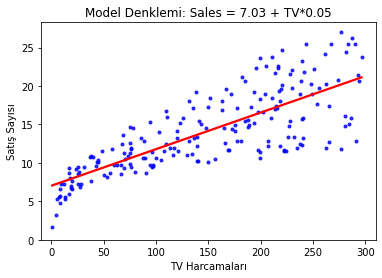

In [ ]:
# Modelin Görselleştirilmesi
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

# ci : güven aralığı
#(reg_model.intercept_[0], 2) virgülden sonra 2 bas. olsun
g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [ ]:
# Tahmin Başarısı

y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)

# y : gerçek değer
# y_pred : tahmin edilen değer

# MSE : 10.51

10.512652915656757

In [ ]:
y.mean()

# ortalamam 14, hata 10 geldi yani hata oldukça yüksek diyebilirsin.

sales   14.02
dtype: float64

In [ ]:
y.std()

sales   5.22
dtype: float64

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y, y_pred))

3.2423221486546887

In [ ]:
# MAE
mean_absolute_error(y, y_pred)

2.549806038927486

Kıyas yaparken MSE, RMSE ve  MAE değerlerini kıyaslamak yerine MSE ilk değeri ile ikinci bulduğun değeri kıyaslamalısın. Yani hataları kendi içinde karşılaştırmalısın.

In [ ]:
# R-KARE
reg_model.score(X, y)

# Doğrusal regresyon için önemlidir. Bağımsız değişkenlerin bağımlı değişkeni açıklama yüzdesidir.
# 1. Değişken sayısı arttıkça r2 değeri şişmeye meyillidir.
# istatistiki çıktılarla ilgilenmiyoruz. (ml yaklaşımıyla optimizasyon yaklaşımıyla yüksek tahmin performansı ile ilgileniyoruz)

0.611875050850071

In [ ]:
# Multiple Linear Regression

df = pd.read_csv("/content/gdrive/My Drive/advertising.csv")

X = df.drop('sales', axis=1)

y = df[["sales"]]

In [ ]:
# Model (test_size=0.20 dolayısıyla train_size= 0.80 olarak parçaladı )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

X_train.shape

(160, 3)

In [ ]:
y_train.shape

(160, 1)

In [ ]:
X_test.shape

(40, 3)

In [ ]:
y_test.shape

(40, 1)

In [ ]:
reg_model = LinearRegression().fit(X_train, y_train)

In [ ]:
# sabit (b - bias)
reg_model.intercept_

array([2.90794702])

In [ ]:
# coefficients (w - weights)
reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

In [ ]:
# Tahmin

# Aşağıdaki gözlem değerlerine göre satışın beklenen değeri nedir?

# TV: 30
# radio: 10
# newspaper: 40

# y = b + w1*TV + w2*radio + w3*newspaper
2.90794702 + 0.0468431*30 + 0.17854434*10 + 0.00258619*40

6.20213102

In [ ]:
# yukarıda tek tek el ile yazdık bunu fonksiyonel bir şekilde yazmak istersen aşağıdaki yöntemi dene:

yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

0   1   2
0  30  10  40

In [ ]:
reg_model.predict(yeni_veri)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[6.202131]])

### Tahmin Başarısını Değerlendirme

In [ ]:
# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

#yukarıya kıyasla hata düştü

1.736902590147092

In [ ]:
# Train RKARE
reg_model.score(X_train, y_train)

# yukarıda sadece TV değişkeni varken 0.60 lardayken diğer değişkenler eklenin 0.89 lara çıktı.

0.8959372632325174

In [ ]:
# Test RMSE
y_pred = reg_model.predict(X_test)

# testteki bağımsız değişkenleri kullanarak bağımlı değişkeni tahmin ediyor

np.sqrt(mean_squared_error(y_test, y_pred))

#train hatası ile test hatası arasında normalde test hatası, train hatasından daha yüksek çıkar. Burada aksi bir örnek olmuş.

1.4113417558581587

In [ ]:
# Test RKARE
reg_model.score(X_test, y_test)

0.8927605914615384

In [ ]:
# 10 Katlı Cross-Validation RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

# neg_mean_squared_error negatif bir değer veriyor dolayısıyla cross_val eksi ile çarptık.
# burada hangi hata değerine güvenmeliyiz dersen veri seti çok boyutlu olsaydı fark etmez diyebilirdin 
# ama az olduğu için 10 katlı çapraz doğrulamaya güvenebilirsin.

1.6913531708051797

In [ ]:
# 5 Katlı Cross-Validation RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="neg_mean_squared_error")))

1.7175247278732086

# BONUS 

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/advertising.csv")

X = df["radio"]
Y = df["sales"]

#parametre: modelin veriyi kullanarak, veriden hareketle bulduğu değerlerdir, yani ağırlıklardır. Bu ağırlıklar veri setinden bulunur.

#hiperparametre : veri setinden bulunamayan kullanıcı tarafından ayarlanması gereken parametrelerdir.

In [ ]:
# Simple Linear Regression with Gradient Descent from Scratch

# Cost function MSE
def cost_function(Y, b, w, X):
  m = len(Y)
  sse = 0
  for i in range(1, m+1):
    y_hat = b + w * X[i]
    y = Y[i]
    sse += (y_hat - y) ** 2

  mse = sse / m
  return mse

#  cost_function görevi MSE değerini hesaplamak. 
# sse : sum of square error hata kareler toplamı

In [ ]:
# update_weights
def update_weights(Y, b, w, X, learning_rate):
  m = len(Y)
  b_deriv_sum = 0
  w_deriv_sum = 0

  for i in range(1, m+1):
    y_hat = b + w * X[i]
    y = Y[i]
    b_deriv_sum += (y_hat - y)
    w_deriv_sum += (y_hat - y) * X[i]

  new_b = b - (learning_rate * 1 / m * b_deriv_sum)
  new_w = w - (learning_rate * 1 / m * w_deriv_sum)
  return new_b, new_w


# burada bir iterasyon yok b,w gibi bir ağırlık çifti vardır, onları gözlem birimlerinden geçiriyoruz. 
# gözlem birimlerinden geçtikten sonra biri sağa biri sola dedi 1/m bakarak ortalama nereye gideceğine karar verir.
# batch gradient descent  : b,w gibi belirli ağırlık çiftlerini kullanırak bütün gözlem değerlerine fikrini sormak
# stokastik gradyan descent : her iterasyonda sadece bir gözlem birimine gidilir
# mini batch gradient descent : 5-10-100 gibi farklı sayıda gözlem birimlerine gidilir.

In [ ]:
# train fonksiyonu
def train(Y, initial_b, initial_w, X, learning_rate, num_iters):
  
  print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X))) #ilk hatanın raporlandığı bölüm
  b = initial_b
  w = initial_w

  cost_history = []

  for i in range(num_iters):
    b, w = update_weights(Y, b, w, X, learning_rate)
    mse = cost_function(Y, b, w, X)
    cost_history.append(mse)
     
    if i % 100 == 0: #her 100 de 1 i raporla
      print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))


  print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
  return cost_history, b, w

In [ ]:
# hyperparameters
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 1000

In [ ]:
cost_history, b, w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)

Starting gradient descent at b = 0.001, w = 0.001, mse = 222.9477491673001
iter=0    b=0.01    w=0.3708    mse=53.25
iter=100    b=0.28    w=0.4788    mse=41.6
iter=200    b=0.54    w=0.4709    mse=40.29
iter=300    b=0.79    w=0.4633    mse=39.04
iter=400    b=1.03    w=0.4559    mse=37.87
iter=500    b=1.27    w=0.4487    mse=36.76
iter=600    b=1.49    w=0.4417    mse=35.72
iter=700    b=1.72    w=0.4349    mse=34.73
iter=800    b=1.93    w=0.4283    mse=33.8
iter=900    b=2.14    w=0.4219    mse=32.92
After 1000 iterations b = 2.343098266484275, w = 0.41573597707268284, mse = 32.09637512179127
